In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:
def get_data_mini(setting, step, moving_step=5):
    if info: print(setting)
    temp = list()
    seeds = [10, 11, 12, 13]
    for seed in seeds:
        foldername = "./results/miniimagenet/5_way_25_shot/mini_5w25s15q_FO_{}seed{}/test_E9S800.csv".format(setting, seed)
        try:
            data = pd.read_csv(foldername).values[:,step]
        except:
#                 print(foldername)
            continue
        temp.append(data)
        continue
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

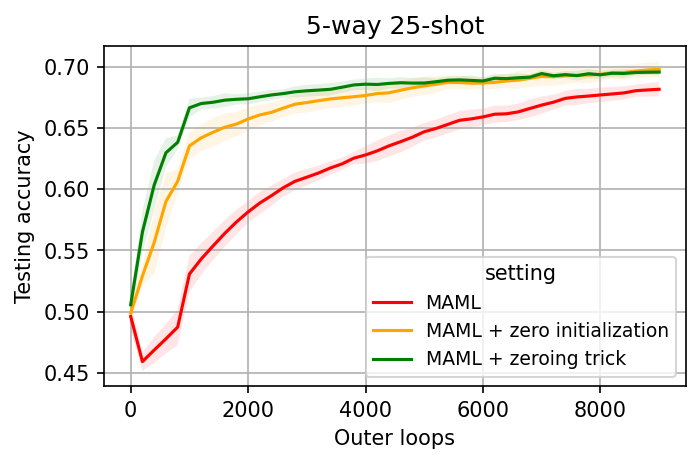

In [3]:
fill_color = True
info = False

labels = [
    "MAML + zeroing trick", 
    "MAML + zero initialization", 
    "MAML", 
    "init: w*0.5",
    "init: w=0",
    "per outer loop: w=0"
]

for step in [5]:
    fig, axes = plt.subplots(1,1,figsize=(5,3),dpi=150)
    
    mean, std = get_data_mini("initvar1.0_", step)
    axes.plot(np.arange(len(mean))*200, mean, label=labels[2], c="red")
    if fill_color: axes.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)
    mean, std = get_data_mini("initvar0.0_", step)
    axes.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
    if fill_color: axes.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)
    mean, std = get_data_mini("zero1_initvar1.0_", step)
    axes.plot(np.arange(len(mean))*200, mean, label=labels[0], c="green")
    if fill_color: axes.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

    axes.set_xlabel("Outer loops")
    axes.set_xlabel("Outer loops")
    axes.set_ylabel("Testing accuracy")
    axes.set_title("5-way 25-shot")
    axes.tick_params(axis='both', which='major')
    axes.tick_params(axis='both', which='major')
    axes.legend(loc=4, title="setting", title_fontsize=10, fontsize=9)
    axes.grid()

plt.savefig("./images/mini_large_shots_20220301.pdf", bbox_inches='tight')